In [33]:
import pandas as pd
import numpy as np


In [34]:
df=pd.read_csv("Churn_Modelling.csv")

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [37]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [38]:
# sepratee dependent and independent feature
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [39]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [40]:
# apply get_dumeis at categorical feaature
x=pd.get_dummies(x,columns=["Geography","Gender",],drop_first=True)

In [41]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [42]:
# apply label encoding at surname column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x["Surname"]=le.fit_transform(x["Surname"])

In [43]:
# now split the data set in train_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)
print("shape of Y_teain",y_test.shape)
print("shappe of y_test",y_test.shape)

shape of x_train (8000, 14)
shape of x_test (2000, 14)
shape of Y_teain (2000,)
shappe of y_test (2000,)


In [45]:
# appply feature scaling(feature scaling is very importent for deep learning)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [46]:
# now lets create a ANN
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LeakyReLU,PReLU,ELU,ReLU

In [47]:
classifier=Sequential()

In [48]:
# create input layer
classifier.add(Dense(units=8,activation="relu"))


In [49]:
classifier.add(Dense(units=7,activation="relu"))

In [50]:
#create output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [51]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [52]:
# apply early_stopping
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [53]:
history=classifier.fit(x_train,y_train,validation_split=0.33,epochs=30,batch_size=10,callbacks=early_stopping)

Epoch 1/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7530 - loss: 0.5593 - val_accuracy: 0.7936 - val_loss: 0.4681
Epoch 2/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7973 - loss: 0.4522 - val_accuracy: 0.8046 - val_loss: 0.4447
Epoch 3/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7986 - loss: 0.4411 - val_accuracy: 0.8107 - val_loss: 0.4323
Epoch 4/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8274 - loss: 0.4144 - val_accuracy: 0.8156 - val_loss: 0.4226
Epoch 5/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8293 - loss: 0.4137 - val_accuracy: 0.8266 - val_loss: 0.4114
Epoch 6/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8302 - loss: 0.3951 - val_accuracy: 0.8323 - val_loss: 0.4002
Epoch 7/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8436 - loss: 0.3793 - val_accuracy: 0.8410 - val_loss: 0.3917
Epoch 8/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8477 - loss: 0.3688 - val_accuracy: 0.

In [54]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

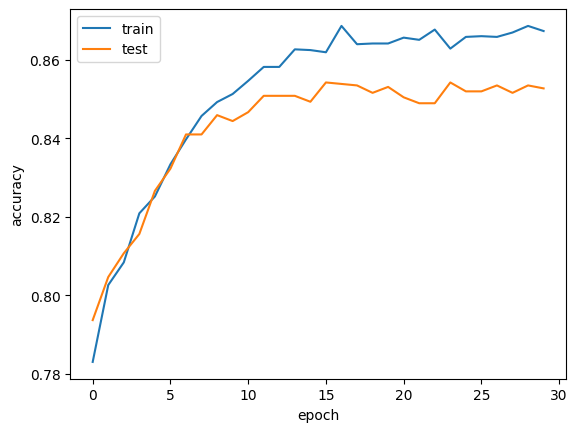

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

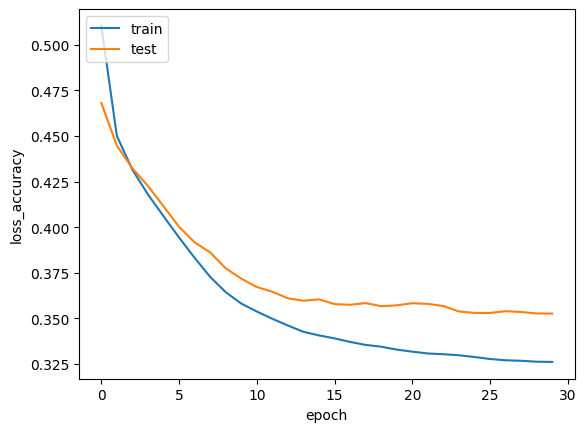

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("loss_accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [59]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1506,   89],
       [ 196,  209]])

In [62]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8575

In [63]:
y_test

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
...,...
1037,0
2899,0
9549,0
2740,0


In [67]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])